# <center>Crime Data from the City of Los Angeles Dating back to 2020</center>

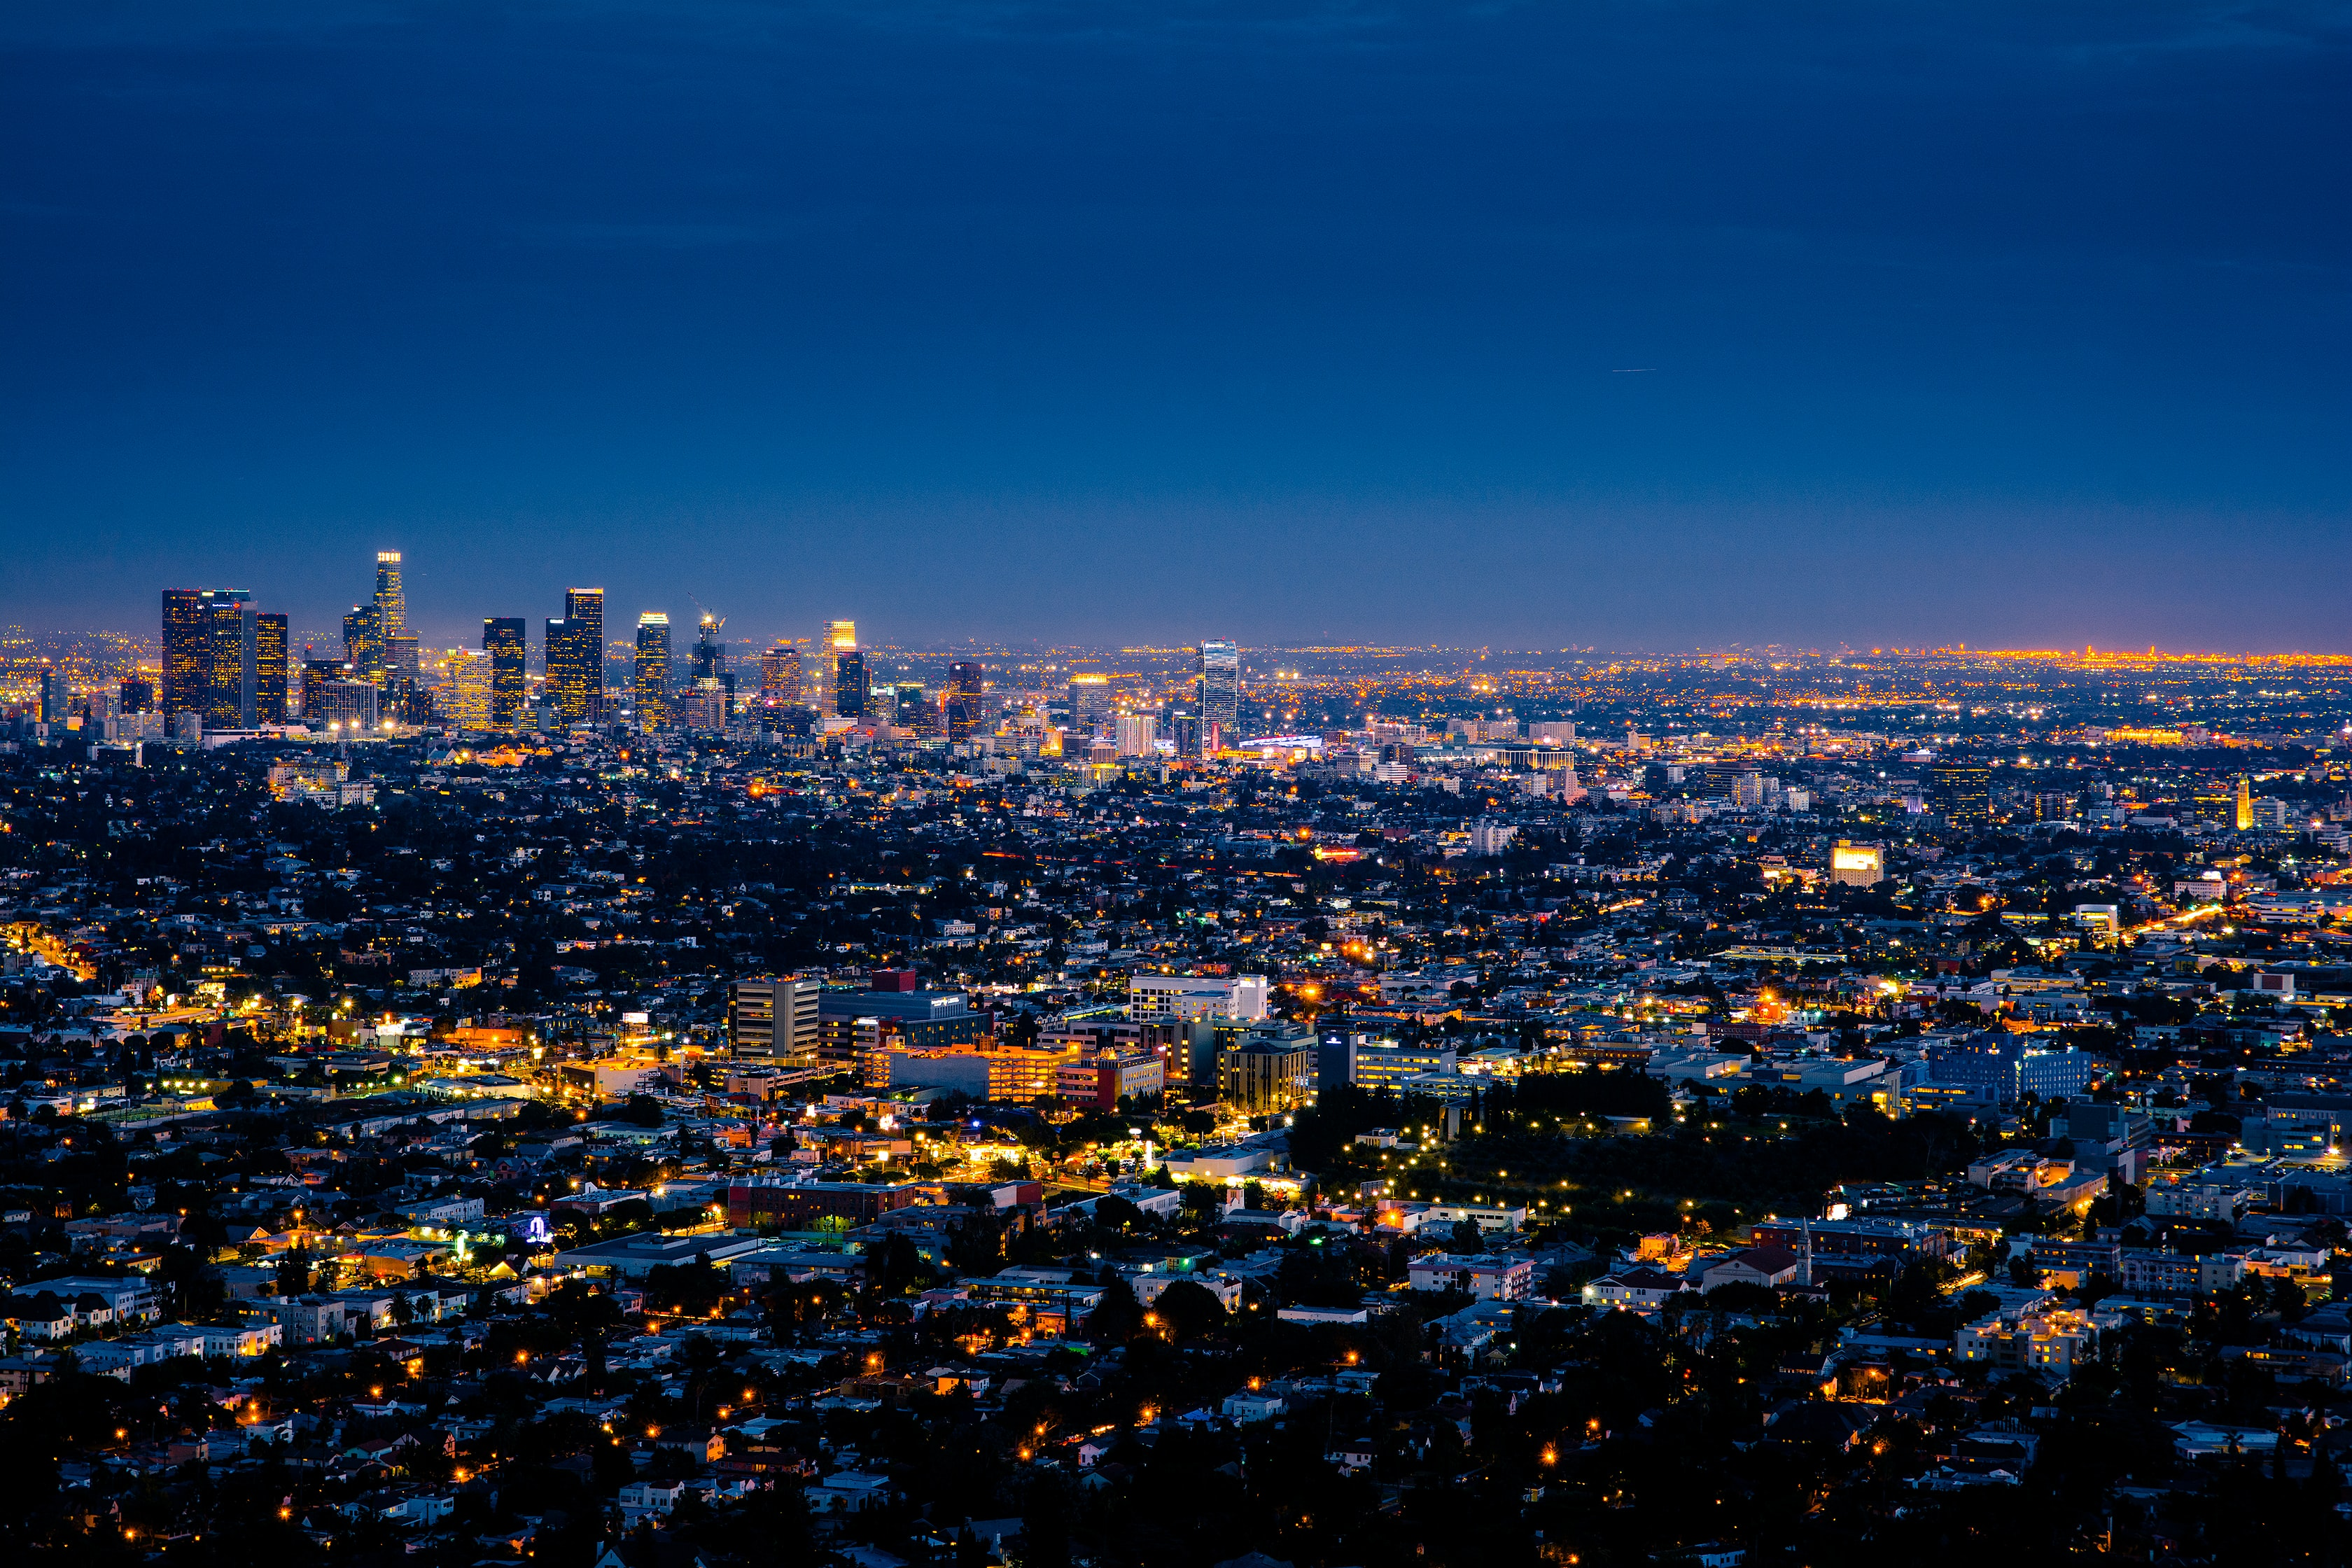

I chose this dataset because it offers an excellent opportunity to explore the most populous city in California, which has a population size of around 12.5 million. By examining the data, we can gain insights into how crime is distributed across different areas, what types of crimes are most prevalent, and whether there are any patterns based on race, gender, frequency of occurrence, or other factors.

The data was obtained from www.data.gov and covers recorded crimes from January 1, 2020 to March 13, 2023. This dataset provides a comprehensive picture of the crime situation in the city over the past few years, making it an ideal resource for anyone interested in exploring crime trends and patterns in this area.

In this exploration, I conducted various data cleaning operations such as handling null values, removing duplicates, replacing incorrect values, converting data formats, and removing unnecessary data. I also utilized different Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly to create visual representations of the data in order to answer specific research questions.





In [1]:
# Import the libraries as needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly.graph_objects as go




In [2]:
# Upload the CSV file

df = pd.read_csv(r"C:\Users\jason\Downloads\Crime_Data_from_2020_to_Present(1).csv")
df2 = pd.read_csv(r'C:\Users\jason\Downloads\Crime_Data_from_2010_to_2019.csv')

In [3]:
# Sneak peak of the first 5 rows

df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [4]:
# Check the size of the data

df.shape

(682335, 28)

In [5]:
# Look at the data types

df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [6]:
# Check for missing values

df.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            93773
Vict Age               0
Vict Sex           89346
Vict Descent       89351
Premis Cd              8
Premis Desc          357
Weapon Used Cd    445186
Weapon Desc       445186
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          631351
Crm Cd 3          680618
Crm Cd 4          682283
LOCATION               0
Cross Street      571229
LAT                    0
LON                    0
dtype: int64

## Cleaning the dataset

In [7]:
# Remove rows that won't be necessary for exploration

df.drop(['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3' ,'Crm Cd 4','Mocodes','Status',
        'Weapon Desc','Weapon Used Cd','Part 1-2', 'Cross Street','Rpt Dist No','DR_NO','Status Desc' ], axis= 1,inplace=True)

In [8]:
df.head()

Date Rptd                DATE OCC  TIME OCC  AREA  \
0  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Crm Cd                                        Crm Cd Desc  \
0    Southwest     624                           BATTERY - SIMPLE ASSAULT   
1      Central     624                           BATTERY - SIMPLE ASSAULT   
2      Central     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE   
3  N Hollywood     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)   
4      Mission     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   

   Vict Age Vict Sex Vict Descent  Premis Cd  \
0        36        F            B      501.0   
1        25        M            H      102.0   
2         0        X            X      726.0   
3        76        F            W      502.0   
4        31        X            X      409.0   

                                    Premis Desc  \
0                        SINGLE FAMILY DWELLING   
1                                      SIDEWALK   
2                               POLICE FACILITY   
3  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4                           BEAUTY SUPPLY STORE   

                                   LOCATION      LAT       LON  
0   1100 W  39TH                         PL  34.0141 -118.2978  
1    700 S  HILL                         ST  34.0459 -118.2545  
2    200 E  6TH                          ST  34.0448 -118.2474  
3   5400    CORTEEN                      PL  34.1685 -118.4019  
4  14400    TITUS                        ST  34.2198 -118.4468

In [9]:
# Looking for duplicates in the data set

df.duplicated().value_counts()

False    679378
True       2957
dtype: int64

In [10]:
# Remove duplicates in the data set

df.drop_duplicates(inplace=True)

<AxesSubplot:>

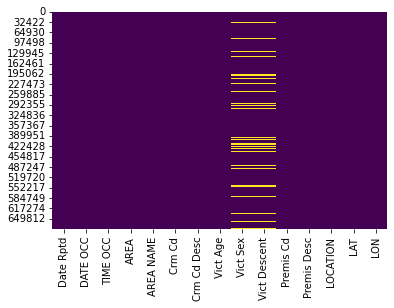

In [11]:
# We want to see a visual of the remaining missing values, many values are missing in the Sex and Descent columns,

sns.heatmap(df.isnull(), cmap='viridis', cbar=False)


In [12]:
# Looking at the sex and descent columns,there is a lot of dating missing
# We can explore this further

sex_p = df['Vict Sex'].isna().value_counts(normalize=True) * 100
sex_p

False    86.9644
True     13.0356
Name: Vict Sex, dtype: float64

In [13]:
# When we explore further, we can see that the missing values relate to crimes that happened weren't
# related to a specific individual

df[df['Vict Sex'].isna()]

Date Rptd                DATE OCC  TIME OCC  AREA  \
33      09/15/2020 12:00:00 AM  09/03/2020 12:00:00 AM      2000     1   
45      06/15/2022 12:00:00 AM  11/12/2020 12:00:00 AM      1700    14   
78      01/02/2020 12:00:00 AM  01/02/2020 12:00:00 AM       345     1   
104     11/12/2020 12:00:00 AM  11/12/2020 12:00:00 AM       430     5   
105     04/15/2020 12:00:00 AM  04/12/2020 12:00:00 AM      1300     6   
...                        ...                     ...       ...   ...   
682285  02/19/2023 12:00:00 AM  02/19/2023 12:00:00 AM       330     5   
682296  03/02/2023 12:00:00 AM  03/01/2023 12:00:00 AM       600     3   
682315  01/07/2023 12:00:00 AM  01/06/2023 12:00:00 AM       800    10   
682319  02/23/2023 12:00:00 AM  02/22/2023 12:00:00 AM      2130     7   
682323  02/28/2023 12:00:00 AM  02/27/2023 12:00:00 AM      1900     3   

          AREA NAME  Crm Cd  \
33          Central     510   
45          Pacific     420   
78          Central     510   
104          Harbor     510   
105       Hollywood     510   
...             ...     ...   
682285       Harbor     510   
682296    Southwest     510   
682315  West Valley     420   
682319     Wilshire     510   
682323    Southwest     522   

                                              Crm Cd Desc  Vict Age Vict Sex  \
33                                       VEHICLE - STOLEN         0      NaN   
45        THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
78                                       VEHICLE - STOLEN         0      NaN   
104                                      VEHICLE - STOLEN         0      NaN   
105                                      VEHICLE - STOLEN         0      NaN   
...                                                   ...       ...      ...   
682285                                   VEHICLE - STOLEN         0      NaN   
682296                                   VEHICLE - STOLEN         0      NaN   
682315    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
682319                                   VEHICLE - STOLEN         0      NaN   
682323  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...         0      NaN   

       Vict Descent  Premis Cd     Premis Desc  \
33              NaN      707.0  GARAGE/CARPORT   
45              NaN      101.0          STREET   
78              NaN      108.0     PARKING LOT   
104             NaN      104.0        DRIVEWAY   
105             NaN      108.0     PARKING LOT   
...             ...        ...             ...   
682285          NaN      101.0          STREET   
682296          NaN      101.0          STREET   
682315          NaN      108.0     PARKING LOT   
682319          NaN      101.0          STREET   
682323          NaN      101.0          STREET   

                                        LOCATION      LAT       LON  
33        500 N  FIGUEROA                     ST  34.0615 -118.2470  
45      13600    MARINA POINT                 DR  33.9876 -118.4489  
78        400 S  SPRING                       ST  34.0488 -118.2500  
104     23400    PRESIDENT                    AV  33.8129 -118.3071  
105      5700    HOLLYWOOD                    BL  34.1017 -118.3136  
...                                          ...      ...       ...  
682285           1ST                          ST  33.7433 -118.2923  
682296   2600 S  BURNSIDE                     AV  34.0325 -118.3605  
682315  19000    SATICOY                      ST  34.2084 -118.5470  
682319   2000 S  HARCOURT                     AV  34.0382 -118.3431  
682323           MCCLINTOCK                   AV  34.0268 -118.2896  

[88561 rows x 15 columns]

In [14]:
# We can substitute the data inplace as just NA

df.fillna(value={'Vict Sex': 'NA', 'Vict Descent': 'NA' }, inplace=True)

In [15]:
# Confirming the change, and checking the remaining missing values

df.isnull().sum()

Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Crm Cd            0
Crm Cd Desc       0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         8
Premis Desc     357
LOCATION          0
LAT               0
LON               0
dtype: int64

In [16]:
# Looking into the 'H' values, looks like they might have been typos, for now I will remove them
# from the set, since they're are only 97 values

df = df[~df['Vict Sex'].str.contains('H')]

#Confirm the removal

df['Vict Sex'].value_counts()

M     282640
F     252366
NA     88561
X      55732
Name: Vict Sex, dtype: int64

In [17]:
# Since there are 357 missing values in 'Premis Desc, I decided to explore further

df['Premis Desc'].value_counts()

STREET                                          171011
SINGLE FAMILY DWELLING                          115589
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     83462
PARKING LOT                                      48629
OTHER BUSINESS                                   31352
                                                 ...  
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: Premis Desc, Length: 306, dtype: int64

In [18]:
# Since the Street has the majority, and adding the null values to it won't affect the analysis, we can
# add them to it

df.fillna(value={'Premis Desc': 'STREET'}, inplace=True)


In [19]:
# Confirming the numbers were added to Street

df['Premis Desc'].value_counts()

STREET                                          171368
SINGLE FAMILY DWELLING                          115589
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     83462
PARKING LOT                                      48629
OTHER BUSINESS                                   31352
                                                 ...  
MTA - SILVER LINE - LAC/USC MEDICAL CENTER           2
MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT         1
TRAM/STREETCAR(BOXLIKE WAG ON RAILS)*                1
DEPT OF DEFENSE FACILITY                             1
HARBOR FRWY STATION (NOT LINE SPECIFIC)              1
Name: Premis Desc, Length: 306, dtype: int64

In [20]:
# Since there's only 8 values we can just drop them, but since I know the Premis Cd for Street
# we can change it to 100.0 to match

df.fillna(value={'Premis Cd':101.0}, inplace=True)

In [21]:
# Verifying all null values were dealt with

df.isna().sum()

Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [22]:
# Looking at the date values, we need to convert to datetime format, then concatenate the reported date
# with the time

df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])

# Convert DATE OCC to datetime format

df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])


# Convert TIME OCC to string format and format as time string

df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

# Combine date and time columns
df['new_datetime'] = pd.to_datetime(df['DATE OCC'].dt.date.astype(str) + ' ' + df['TIME OCC'].astype(str))





In [23]:
# Confirm the data types were converted
df.dtypes

Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA                     int64
AREA NAME               object
Crm Cd                   int64
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Premis Cd              float64
Premis Desc             object
LOCATION                object
LAT                    float64
LON                    float64
new_datetime    datetime64[ns]
dtype: object

In [24]:
#Exploring the age column, we see there are some outliers ,and a whole bunch of values pertaining to 0

df['Vict Age'].value_counts(normalize=True)

 0      0.240164
 30     0.023222
 35     0.022501
 31     0.022124
 29     0.022114
          ...   
 98     0.000075
 97     0.000074
-1      0.000053
-2      0.000004
 120    0.000001
Name: Vict Age, Length: 102, dtype: float64

Text(0, 0.5, 'Count')

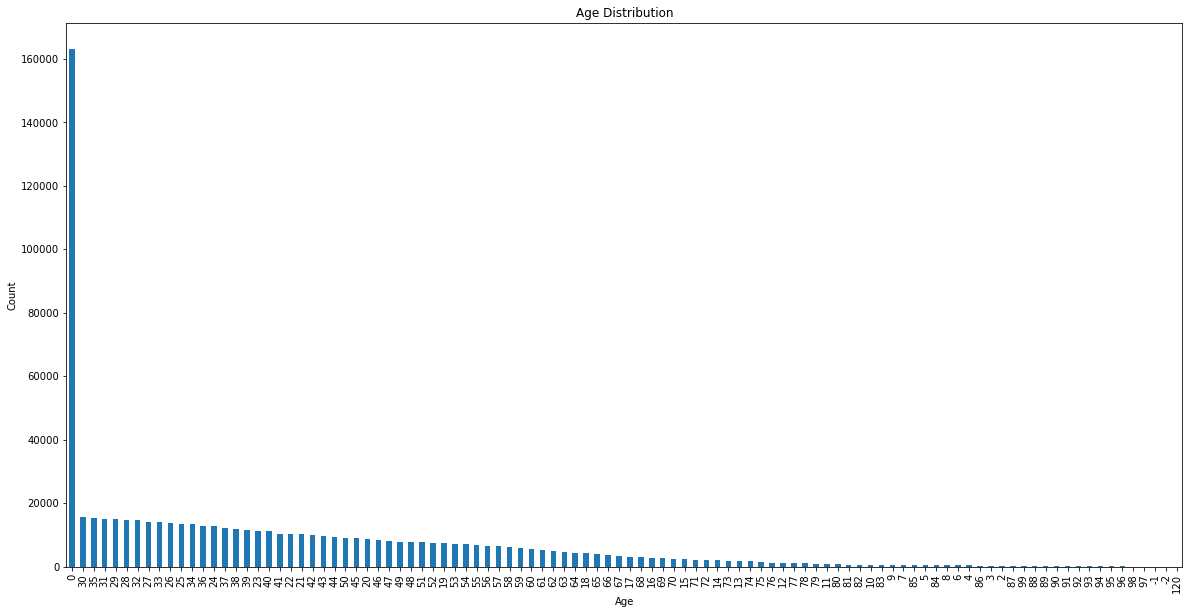

In [25]:
#Plot the age range

ax = df['Vict Age'].value_counts().plot(kind='bar',figsize=(20,10),title='Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')


In [26]:
# Investigating the outliers

#df.loc[df['Vict Age'] == -2]
#df.loc[df['Vict Age'] == -1]
#df.loc[df['Vict Age'] == 120]
df.loc[df['Vict Age'] == 0]


Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
2      2020-04-14 2020-02-13  12:00:00     1      Central     845   
7      2020-01-04 2020-01-04  00:40:00     1      Central     946   
9      2020-06-19 2020-05-26  19:25:00    17   Devonshire     341   
13     2020-01-07 2020-01-07  16:38:00     1      Central     648   
33     2020-09-15 2020-09-03  20:00:00     1      Central     510   
...           ...        ...       ...   ...          ...     ...   
682315 2023-01-07 2023-01-06  08:00:00    10  West Valley     420   
682319 2023-02-23 2023-02-22  21:30:00     7     Wilshire     510   
682322 2023-01-10 2023-01-04  22:55:00    10  West Valley     343   
682323 2023-02-28 2023-02-27  19:00:00     3    Southwest     522   
682329 2023-02-05 2023-02-05  12:50:00    14      Pacific     341   

                                              Crm Cd Desc  Vict Age Vict Sex  \
2               SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
7                               OTHER MISCELLANEOUS CRIME         0        X   
9       THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         0        X   
13                                                  ARSON         0        X   
33                                       VEHICLE - STOLEN         0       NA   
...                                                   ...       ...      ...   
682315    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0       NA   
682319                                   VEHICLE - STOLEN         0       NA   
682322           SHOPLIFTING-GRAND THEFT ($950.01 & OVER)         0        M   
682323  VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...         0       NA   
682329  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...         0        X   

       Vict Descent  Premis Cd       Premis Desc  \
2                 X      726.0   POLICE FACILITY   
7                 X      726.0   POLICE FACILITY   
9                 X      203.0    OTHER BUSINESS   
13                X      404.0  DEPARTMENT STORE   
33               NA      707.0    GARAGE/CARPORT   
...             ...        ...               ...   
682315           NA      108.0       PARKING LOT   
682319           NA      101.0            STREET   
682322            W      402.0            MARKET   
682323           NA      101.0            STREET   
682329            X      402.0            MARKET   

                                        LOCATION      LAT       LON  \
2         200 E  6TH                          ST  34.0448 -118.2474   
7         200 E  6TH                          ST  34.0448 -118.2474   
9       11900    BALBOA                       BL  34.2864 -118.5021   
13        700 W  7TH                          ST  34.0480 -118.2577   
33        500 N  FIGUEROA                     ST  34.0615 -118.2470   
...                                          ...      ...       ...   
682315  19000    SATICOY                      ST  34.2084 -118.5470   
682319   2000 S  HARCOURT                     AV  34.0382 -118.3431   
682322  17800    VENTURA                      BL  34.1629 -118.5202   
682323           MCCLINTOCK                   AV  34.0268 -118.2896   
682329   4300    LINCOLN                      BL  33.9846 -118.4428   

              new_datetime  
2      2020-02-13 12:00:00  
7      2020-01-04 00:40:00  
9      2020-05-26 19:25:00  
13     2020-01-07 16:38:00  
33     2020-09-03 20:00:00  
...                    ...  
682315 2023-01-06 08:00:00  
682319 2023-02-22 21:30:00  
682322 2023-01-04 22:55:00  
682323 2023-02-27 19:00:00  
682329 2023-02-05 12:50:00  

[163143 rows x 16 columns]

In [27]:
# Setting the Outliers to the median age(31)

df.loc[df['Vict Age'] == -1, 'Vict Age'] = df['Vict Age'].median()
df.loc[df['Vict Age'] == -2, 'Vict Age'] = df['Vict Age'].median()
df.loc[df['Vict Age'] == 120, 'Vict Age'] = df['Vict Age'].median()

# Replacing the 0's with NA values, due to finding out the 0's weren't associated with a specific 
# victim

df['Vict Age'] = df['Vict Age'].replace(pd.np.nan, 'NA')

C:\Users\jason\AppData\Local\Temp\ipykernel_7292\1078376444.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['Vict Age'] = df['Vict Age'].replace(pd.np.nan, 'NA')


In [28]:
# Let's now look at the LAT and LON columns

df['LAT'].value_counts()


34.1016    3769
34.0980    3122
34.2012    3084
34.1939    2382
0.0000     2259
           ... 
33.8626       1
33.8008       1
33.8567       1
33.9067       1
33.8168       1
Name: LAT, Length: 5379, dtype: int64

In [29]:
# We see there are 2266 values with 0,0 which indicates they were not reported at the time.
# Since we have the Area name and location, I will keep them in the Dataset for now

location_plot = df[['LAT', 'LON']].value_counts()
location_plot

df.loc[df['LAT'] == 0.0000].head(1)

Date Rptd   DATE OCC  TIME OCC  AREA  AREA NAME  Crm Cd  \
1404 2020-05-27 2020-05-27  10:00:00     3  Southwest     900   

                   Crm Cd Desc  Vict Age Vict Sex Vict Descent  Premis Cd  \
1404  VIOLATION OF COURT ORDER        56        F            H      502.0   

                                       Premis Desc  \
1404  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   

                                     LOCATION  LAT  LON        new_datetime  
1404  4800    COLISEUM                     ST  0.0  0.0 2020-05-27 10:00:00

In [30]:
# Looking at the Descent column, there is a bunch of letters pertaining to a specific race, I did some
#digging and found what they meant

df['Vict Descent'].value_counts()

H     209375
W     140456
B      98343
NA     88566
X      61967
O      53862
A      14822
K       3576
F       2762
C       2495
J        932
V        673
I        653
Z        328
P        181
U        132
G         48
D         47
L         43
S         38
Name: Vict Descent, dtype: int64

In [31]:
# Creating a new column with full race name fromt the Vict Descent column

df['Race'] = df['Vict Descent'].replace('A', 'Other Asian')\
                            .replace('B', 'Black')\
                            .replace('C', 'Chinese')\
                            .replace('D', 'Cambodian')\
                            .replace('F', 'Filipino')\
                            .replace('G', 'Guamanian')\
                            .replace('H', 'Hispanic')\
                            .replace('I', 'American Indian')\
                            .replace('J', 'Japanese')\
                            .replace('K', 'Korean')\
                            .replace('L', 'Laotian')\
                            .replace('O', 'Other')\
                            .replace('P', 'Pacific Islander')\
                            .replace('S', 'Samoan')\
                            .replace('U', 'Hawaiian')\
                            .replace('V', 'Vietnamese')\
                            .replace('W', 'White')\
                            .replace('X', 'Unknown')\
                            .replace('Z', 'South Asian')
#Setting new column permanantely

df['Race'].replace(inplace=True)

#Removing old column

df.drop('Vict Descent',axis=1,inplace=True)


In [32]:
# Confirm the removal

df.head()

Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Crm Cd  \
0 2020-01-08 2020-01-08  22:30:00     3    Southwest     624   
1 2020-01-02 2020-01-01  03:30:00     1      Central     624   
2 2020-04-14 2020-02-13  12:00:00     1      Central     845   
3 2020-01-01 2020-01-01  17:30:00    15  N Hollywood     745   
4 2020-01-01 2020-01-01  04:15:00    19      Mission     740   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE         0        X   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   

   Premis Cd                                   Premis Desc  \
0      501.0                        SINGLE FAMILY DWELLING   
1      102.0                                      SIDEWALK   
2      726.0                               POLICE FACILITY   
3      502.0  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)   
4      409.0                           BEAUTY SUPPLY STORE   

                                   LOCATION      LAT       LON  \
0   1100 W  39TH                         PL  34.0141 -118.2978   
1    700 S  HILL                         ST  34.0459 -118.2545   
2    200 E  6TH                          ST  34.0448 -118.2474   
3   5400    CORTEEN                      PL  34.1685 -118.4019   
4  14400    TITUS                        ST  34.2198 -118.4468   

         new_datetime      Race  
0 2020-01-08 22:30:00     Black  
1 2020-01-01 03:30:00  Hispanic  
2 2020-02-13 12:00:00   Unknown  
3 2020-01-01 17:30:00     White  
4 2020-01-01 04:15:00   Unknown

In [33]:
# Filling in the extra spaces in the Location column

df['LOCATION'] = df['LOCATION'].str.replace(r'\s+', ' ', regex=True)

#Confirm the change

df['LOCATION']

0                1100 W 39TH PL
1                 700 S HILL ST
2                  200 E 6TH ST
3               5400 CORTEEN PL
4                14400 TITUS ST
                  ...          
682330           2000 S HOLT AV
682331        1000 MILWAUKEE AV
682332    10200 SANTA MONICA BL
682333        12500 BRANFORD ST
682334        14500 HARTLAND ST
Name: LOCATION, Length: 679299, dtype: object

## Exploring the Data

###### What are the most abundant crimes in Los Angeles by type?

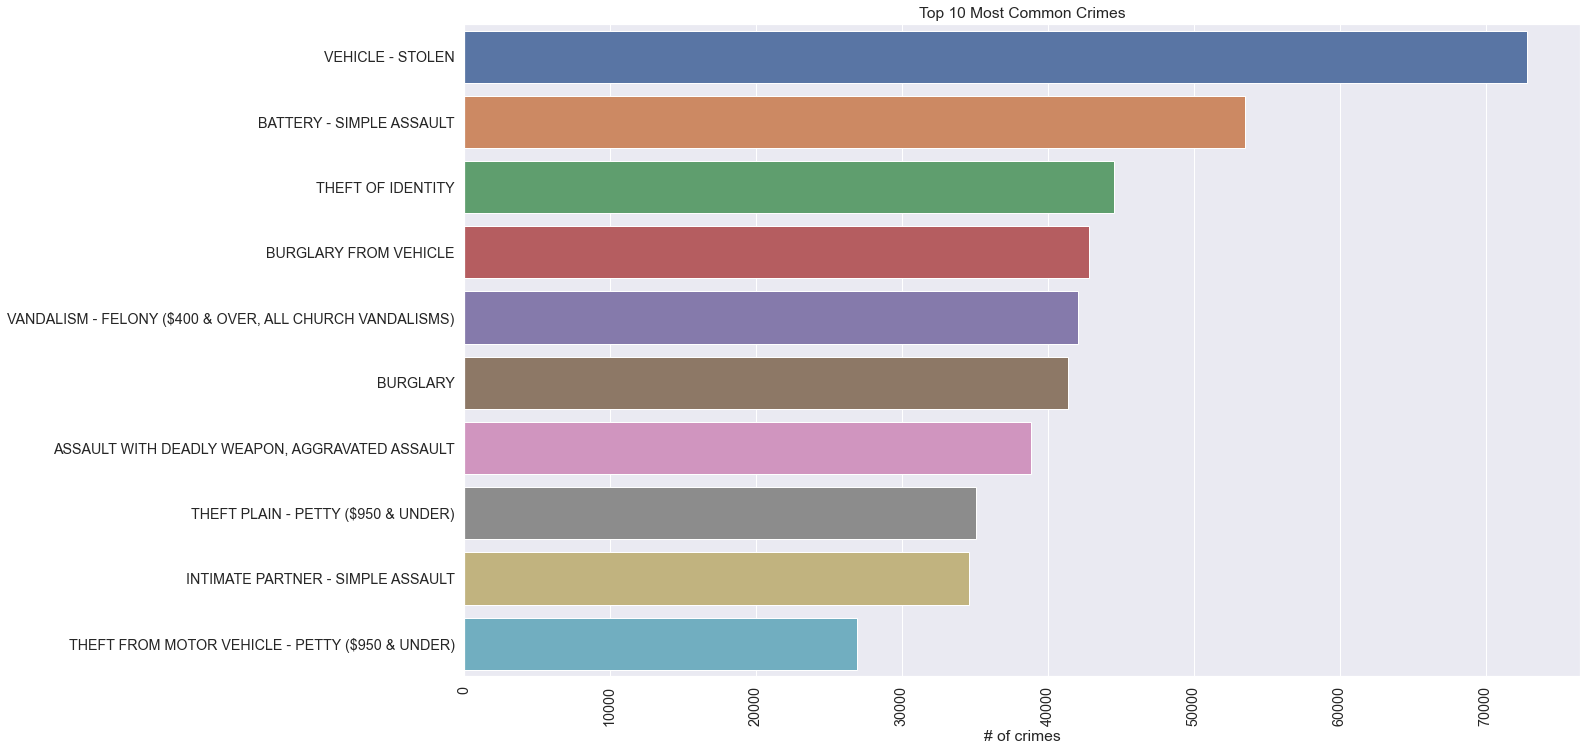

In [35]:
# Visualizing the top 10 crimes my most abundant

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.3)


top_crime = df["Crm Cd Desc"].value_counts().nlargest(10)
ax = sns.countplot(data=df, y="Crm Cd Desc", order=top_crime.index)
ax.set_xlabel('# of crimes')
ax.set_ylabel('')
plt.xticks(rotation=90)
ax.set_title('Top 10 Most Common Crimes')
plt.show()

###### Which area of Los Angeles has the most crime? 

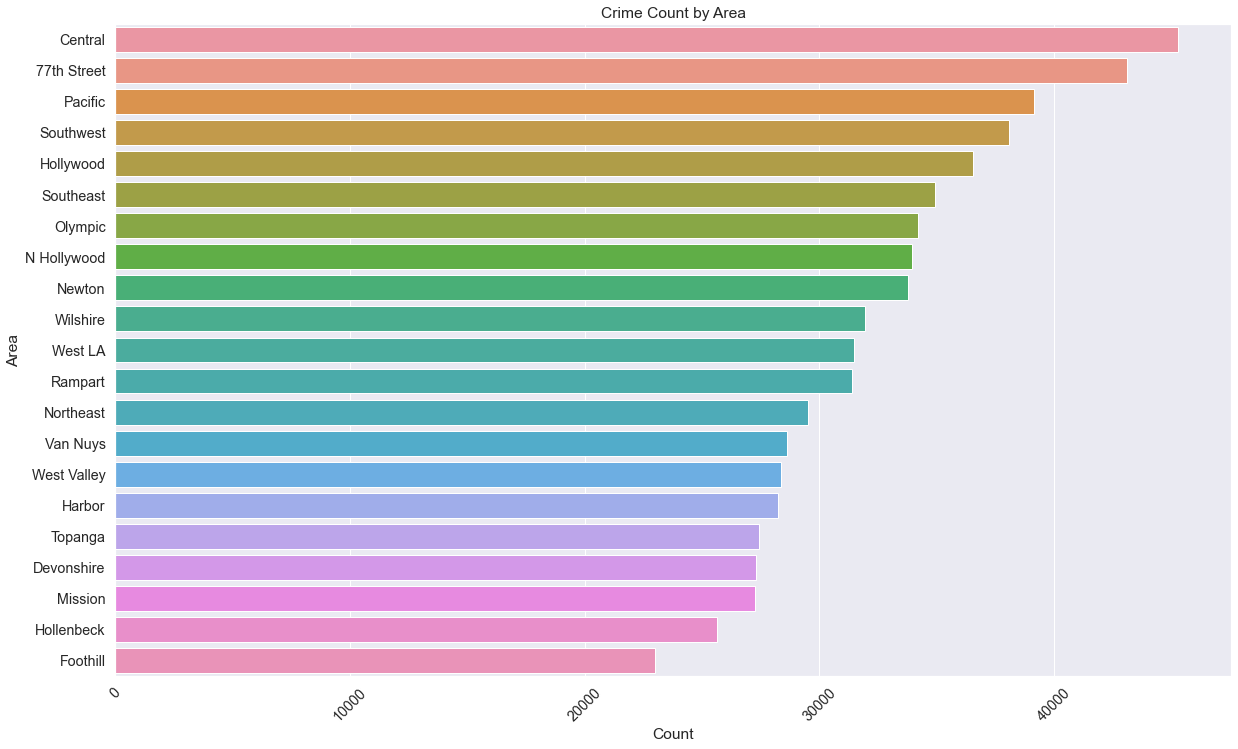

In [36]:
# Plotting the location area by crime count

plt.figure(figsize=(20, 12))
sns.set(font_scale=1.3)

area = df['AREA NAME'].value_counts().sort_values(ascending=False)
ax = sns.countplot(data=df, y='AREA NAME', order=area.index)
ax.set_xlabel('Count')
ax.set_ylabel('Area')
plt.title('Crime Count by Area')
plt.xticks(rotation=45)
plt.show()



###### Is there a particular location that has consistent crime?

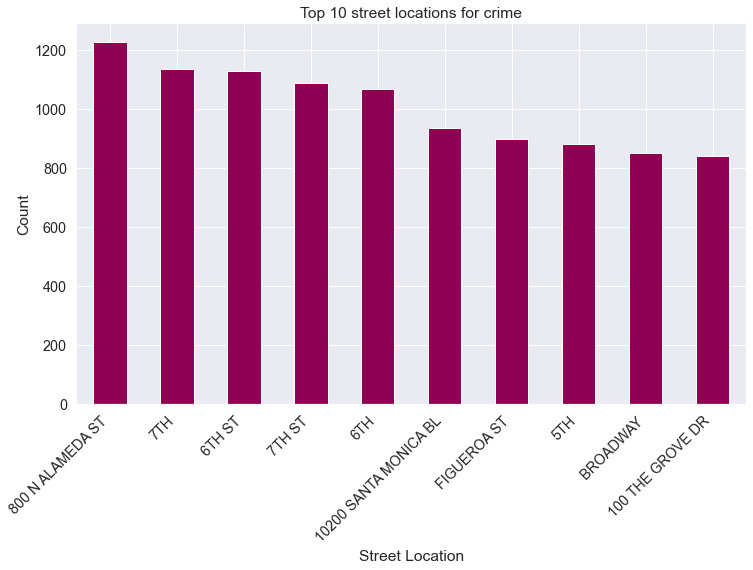

In [37]:
# Plotting the Top 10 locations with frequency of crime counts

location = df['LOCATION'].value_counts().nlargest(10)
ax = location.plot(kind='bar', figsize = (12,7),title = 'Top 10 street locations for crime',cmap='PiYG')
ax.set_xlabel('Street Location')
ax.set_ylabel('Count')
ax.set_xticklabels(location.index, rotation=45, ha='right')
plt.show()

###### Does more crime occur on specific days?

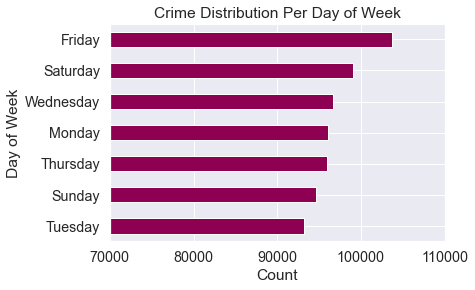

In [38]:
# Finding the frequency of crimes per day of the week

day = df['new_datetime'].dt.day_name()
day.value_counts()

# Plotting the values to see if there's
ax = day.value_counts().plot(kind='barh',title='Crime Distribution Per Day of Week',
                             cmap='PiYG',xlim=(70000,110000))
ax.set_xlabel('Count')
ax.set_ylabel('Day of Week')
ax.invert_yaxis()
plt.show()

###### Is crime more rampant during specific months?

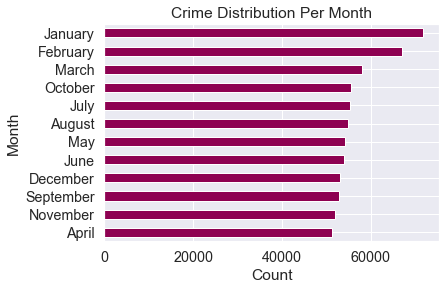

In [39]:
# Finding out which Month most crimes occur
month = df['new_datetime'].dt.month_name()
month.value_counts()

# Plotting the results
ax = month.value_counts().plot(kind='barh',title='Crime Distribution Per Month',
                           cmap='PiYG')
ax.set_xlabel('Count')
ax.set_ylabel('Month')
ax.invert_yaxis()
plt.show()

###### How many days to crimes go until they get reported?

In [40]:
# Figuring out the timeframe for when the crime was reported to when it actually occured 
# as a percentage

timeline = df['DATE OCC'] - df['Date Rptd']
timeline_days = timeline.dt.days.abs()
timeline_days.value_counts(normalize=True)



0       0.494795
1       0.217156
2       0.061862
3       0.036264
4       0.023377
          ...   
911     0.000001
887     0.000001
857     0.000001
1082    0.000001
702     0.000001
Length: 1013, dtype: float64

###### Is crime more prevalent within a specific gender?

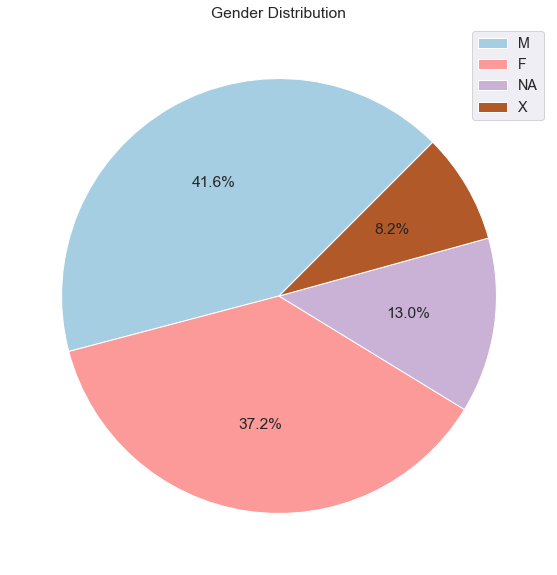

In [41]:
# Male and Female victim crimes are pretty close in comparison

gender_count = df['Vict Sex'].value_counts(normalize=True) * 100 
gender_count

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3)

ax = gender_count.plot(kind='pie',title='Gender Distribution',labels=None,
                             cmap='Paired', autopct='%1.1f%%', startangle=45)

ax.legend(labels=gender_count.index, loc='best')
ax.set_ylabel('')



plt.show()

###### Which age group is involved with the most crime?

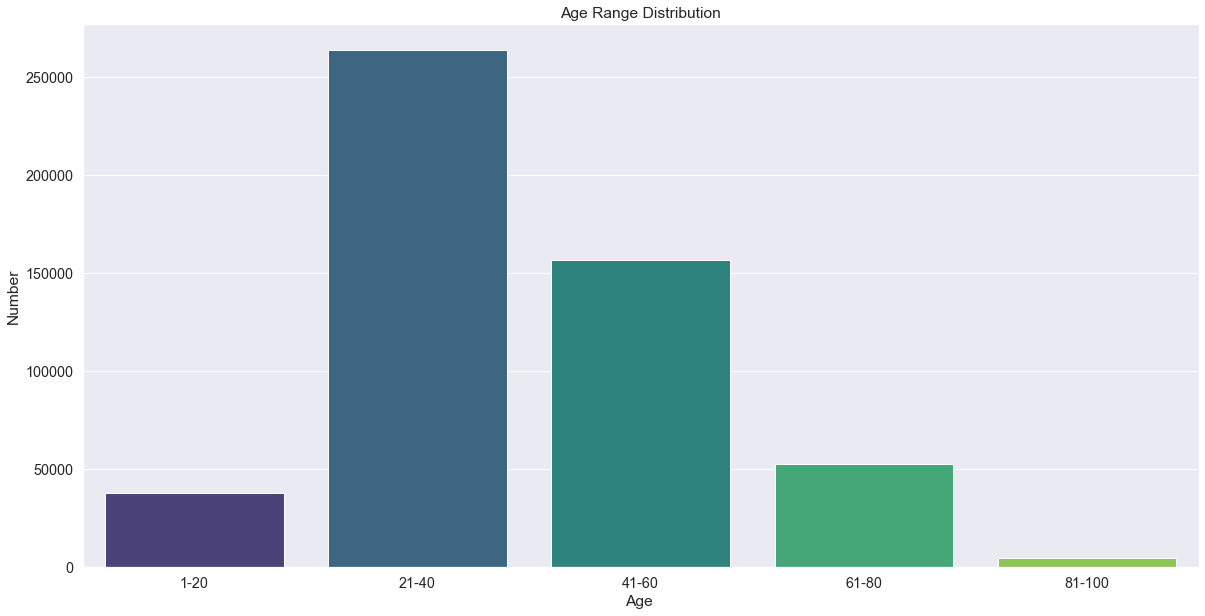

In [42]:
# Showing the age distribution of the victims

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3)


age_groups = pd.cut(df['Vict Age'], bins=[1, 20, 40, 60, 80, 100], labels=['1-20', '21-40', '41-60', 
                                                                 '61-80', '81-100'])
age_counts = age_groups.value_counts()

sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')
plt.title('Age Range Distribution')
plt.xlabel('Age ')
plt.ylabel('Number')


plt.show()

###### Which points of interest have the most crimes?

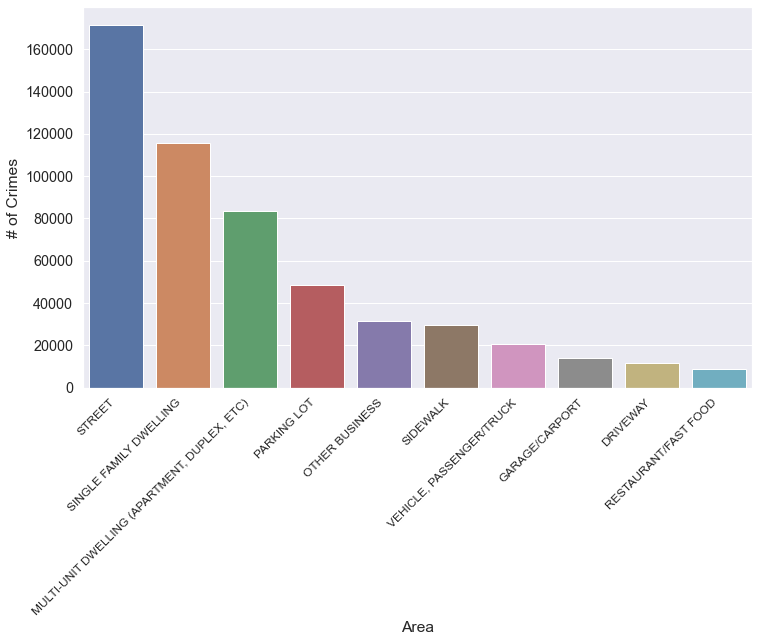

In [43]:
# Visualizing the Top 10 areas where crimes took place

plt.figure(figsize=(12, 7))
sns.set(font_scale=1.3)

area = df['Premis Desc'].value_counts().nlargest(10)
ax = sns.countplot(data=df, x='Premis Desc', order=area.index)
ax.set_xlabel('Area')
ax.set_ylabel('# of Crimes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

###### Are crimes more prevelant with a particular race or group?

In [44]:
#Exploring the victim crimes by race

race = df['Race'].value_counts()
race

Hispanic            209375
White               140456
Black                98343
NA                   88566
Unknown              61967
Other                53862
Other Asian          14822
Korean                3576
Filipino              2762
Chinese               2495
Japanese               932
Vietnamese             673
American Indian        653
South Asian            328
Pacific Islander       181
Hawaiian               132
Guamanian               48
Cambodian               47
Laotian                 43
Samoan                  38
Name: Race, dtype: int64

In [45]:
# Plotting victim crime by race
race_counts = df['Race'].value_counts().nlargest(10).sort_values(ascending=False)
fig = px.bar(x=race_counts.index, y=race_counts.values, color=race_counts.index,
             labels={'x': 'Race', 'y': 'Count'}, title='Victim Crime By Race')
fig.show()


### A few comparisons from 2020 to 2022 

###### The trend continues

In [46]:
# Separating the data by Year, and specifying the increase in vehicle's stolen

year_20_vehicle_stolen = df[(df['DATE OCC'].dt.year == 2020) & (df['Crm Cd Desc'] == 'VEHICLE - STOLEN')]
year_21_vehicle_stolen = df[(df['DATE OCC'].dt.year == 2021) & (df['Crm Cd Desc'] == 'VEHICLE - STOLEN')]
year_22_vehicle_stolen = df[(df['DATE OCC'].dt.year == 2022) & (df['Crm Cd Desc'] == 'VEHICLE - STOLEN')]

# Plotting the results
veh = pd.DataFrame({'Year': ['2020', '2021', '2022'], 
                   'Vehicle Stolen': [len(year_20_vehicle_stolen), len(year_21_vehicle_stolen), len(year_22_vehicle_stolen)]})

fig = px.bar(veh, x='Year', y='Vehicle Stolen', title='Vehicle Stolen by Year')
fig.show()

###### A quick visual of the total crimes increasing since 2020

In [47]:
# Extract all data by year
year_20 = df[df['DATE OCC'].dt.year == 2020]
year_21 = df[df['DATE OCC'].dt.year == 2021]
year_22 = df[df['DATE OCC'].dt.year == 2022]

# Create a dataframe
g = pd.DataFrame({'Year': ['2020', '2021', '2022'], 
                   'Incidents': [len(year_20), len(year_21), len(year_22)]})

# Plot the data

fig = go.Figure(data=[go.Scatter(x=g['Year'], y=g['Incidents'], mode='lines+markers')])
fig.update_layout(title='Incidents by Year')
fig.show()

###### Top 10 crime type comparisons 2020-2022 by numbers

In [48]:
year_20['Crm Cd Desc'].value_counts().nlargest(10)

VEHICLE - STOLEN                                           20537
BATTERY - SIMPLE ASSAULT                                   16277
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    12894
BURGLARY                                                   12769
BURGLARY FROM VEHICLE                                      12695
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             11392
INTIMATE PARTNER - SIMPLE ASSAULT                          10826
THEFT PLAIN - PETTY ($950 & UNDER)                         10822
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             9708
THEFT OF IDENTITY                                           8535
Name: Crm Cd Desc, dtype: int64

In [49]:
year_21['Crm Cd Desc'].value_counts().nlargest(10)

VEHICLE - STOLEN                                           23463
BATTERY - SIMPLE ASSAULT                                   16126
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    13659
BURGLARY FROM VEHICLE                                      13453
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             12583
BURGLARY                                                   12146
THEFT PLAIN - PETTY ($950 & UNDER)                         11156
THEFT OF IDENTITY                                          10858
INTIMATE PARTNER - SIMPLE ASSAULT                          10752
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             8234
Name: Crm Cd Desc, dtype: int64

In [50]:
year_22['Crm Cd Desc'].value_counts().nlargest(10)

VEHICLE - STOLEN                                           24429
THEFT OF IDENTITY                                          21086
BATTERY - SIMPLE ASSAULT                                   17958
BURGLARY FROM VEHICLE                                      14171
BURGLARY                                                   13936
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    13280
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             12706
THEFT PLAIN - PETTY ($950 & UNDER)                         11261
INTIMATE PARTNER - SIMPLE ASSAULT                          11087
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        10039
Name: Crm Cd Desc, dtype: int64

## Bonus: Adding total crime data from 2010-2019 for comparison

In [51]:
# Convert the DATE OCC column to datetime, so we can use the dt features

df2['DATE OCC'] = pd.to_datetime(df2['DATE OCC'])

# Grab the data by the date occured

year_10 = df2[df2['DATE OCC'].dt.year == 2010]
year_11 = df2[df2['DATE OCC'].dt.year == 2011]
year_12 = df2[df2['DATE OCC'].dt.year == 2012]
year_13 = df2[df2['DATE OCC'].dt.year == 2013]
year_14 = df2[df2['DATE OCC'].dt.year == 2014]
year_15 = df2[df2['DATE OCC'].dt.year == 2015]
year_16 = df2[df2['DATE OCC'].dt.year == 2016]
year_17 = df2[df2['DATE OCC'].dt.year == 2017]
year_18 = df2[df2['DATE OCC'].dt.year == 2018]
year_19 = df2[df2['DATE OCC'].dt.year == 2019]
year_20 = df[df['DATE OCC'].dt.year == 2020]
year_21 = df[df['DATE OCC'].dt.year == 2021]
year_22 = df[df['DATE OCC'].dt.year == 2022]

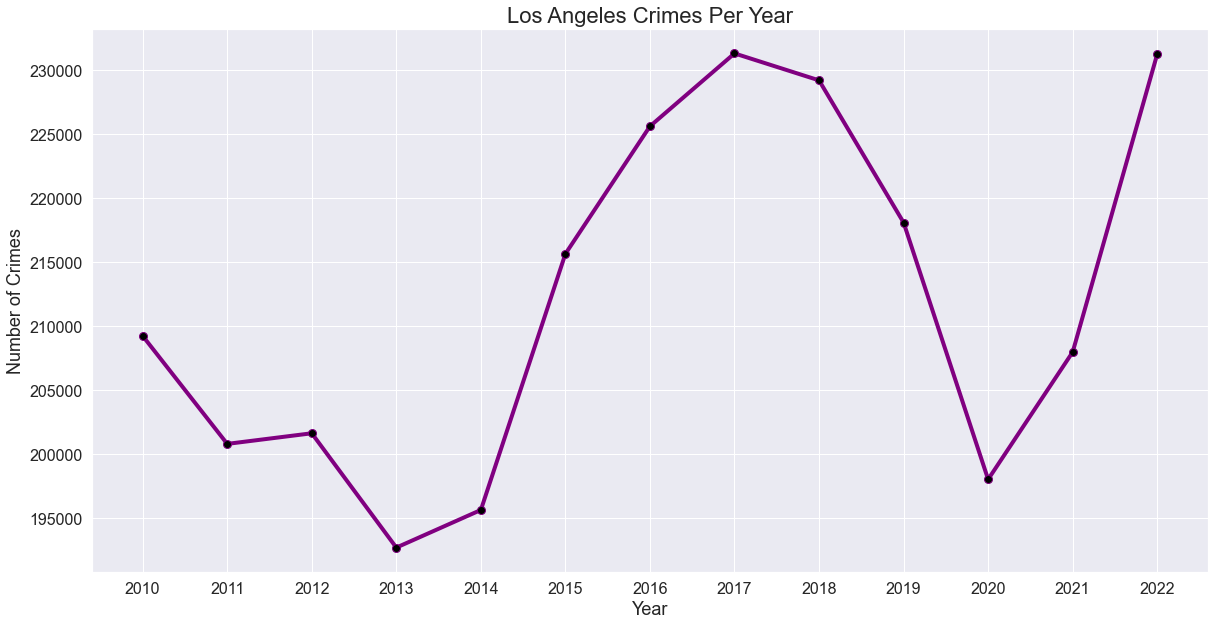

In [52]:
# Put the year and len in a list, access year from DATE OCC, extract unique year of 1, and then convert
# to a string to use as a label

years = [year_10, year_11, year_12, year_13, year_14, year_15, year_16, year_17, year_18, year_19,year_20, year_21,year_22]
counts = [len(year) for year in years]
labels = [str(year['DATE OCC'].dt.year.unique()[0]) for year in years]

# Plot the points

plt.figure(figsize=(20, 10))
plt.plot(labels, counts,color='purple',marker='o',markerfacecolor='black',lw=4,markersize=8)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Crimes', fontsize=18)
plt.title('Los Angeles Crimes Per Year', fontsize=22)
plt.tick_params(axis='both', labelsize=16)
plt.show()

#### The COVID-19 pandemic had a significant impact on crime rates in 2020, with the total number of reported crimes dropping to a level similar to that seen in 2014. However, since then, crime rates have been increasing steadily, and as of 2022, they are approaching the peak levels seen in 2017. It remains to be seen whether this trend will continue in 2023.

In conclusion, this data exploration was an enjoyable exercise that revealed the true complexity of the dataset. As I delved deeper, I uncovered numerous discrepancies and odd values that had to be dealt with, either by removal or replacement. Despite these challenges, the data provided answers to several research questions, with potential for further exploration.

However, due to the lack of metadata sources, it was challenging to determine the meaning of certain values and whether they were placed in the correct columns. Additionally, it is worth noting that crime reporting is typically done on paper, which can lead to inaccuracies.

The data clearly shows a steady increase in crime in one of the largest cities in America, which could be attributed to various factors such as economic instability, gang activity, drug use and trafficking, mental health issues, and political factors. The issue of rising crime rates in Los Angeles is complex and multifaceted, and requires a holistic approach to fully address.


